In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from osc.loss_objects import (
    matching_contrastive_loss,
    matching_contrastive_loss_per_img,
)
from osc.utils import cos_pairwise

K = 5
B = 4
C = 128

device = "cuda:2"

tensor(0.7292, device='cuda:2')
tensor(0.0041, device='cuda:2')


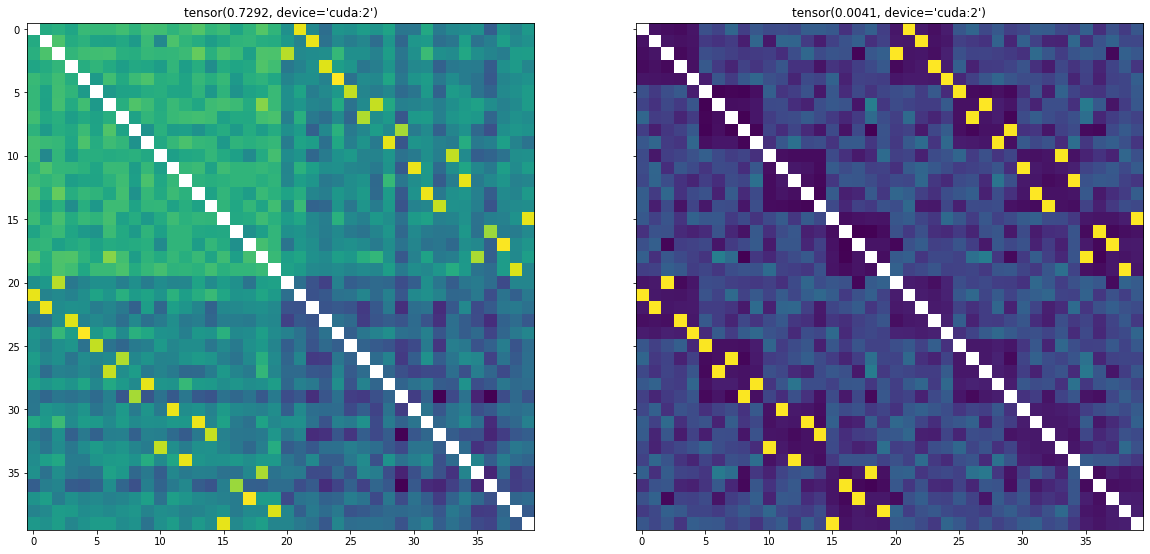

In [2]:
torch.manual_seed(0)
np.random.seed(0)
fig, axs = plt.subplots(1, 2, figsize=(20, 10), sharex=True, sharey=True)

slots = torch.empty(2, B, K, C, device=device)
for b in range(B):
    slots[0, b, :, :] = torch.rand_like(slots[0, b, :, :])
    slots[1, b, :, :] = slots[0, b, :, :] + 0.3 * torch.randn_like(slots[0, b, :, :])
    slots[1, b, :, :] = slots[1, b, np.random.permutation(K), :]
slots = slots.reshape(2 * B, K, -1)

cos = (
    cos_pairwise(slots.reshape(2 * B * K, -1)).fill_diagonal_(-torch.inf).cpu().numpy()
)
axs[0].imshow(cos)
axs[0].set_title(str(matching_contrastive_loss_per_img(slots, 0.1)))

print(matching_contrastive_loss_per_img(slots, 0.1))
for i in range(30_000):
    slots.requires_grad_()
    slots.grad = None
    matching_contrastive_loss_per_img(slots, 0.1).backward()
    slots = slots.detach() - 0.1 * slots.grad
print(matching_contrastive_loss_per_img(slots, 0.1))

cos = (
    cos_pairwise(slots.reshape(2 * B * K, -1)).fill_diagonal_(-torch.inf).cpu().numpy()
)
axs[1].imshow(cos)
axs[1].set_title(str(matching_contrastive_loss_per_img(slots, 0.1)));

tensor(1.8334, device='cuda:2')
tensor(0.0275, device='cuda:2')


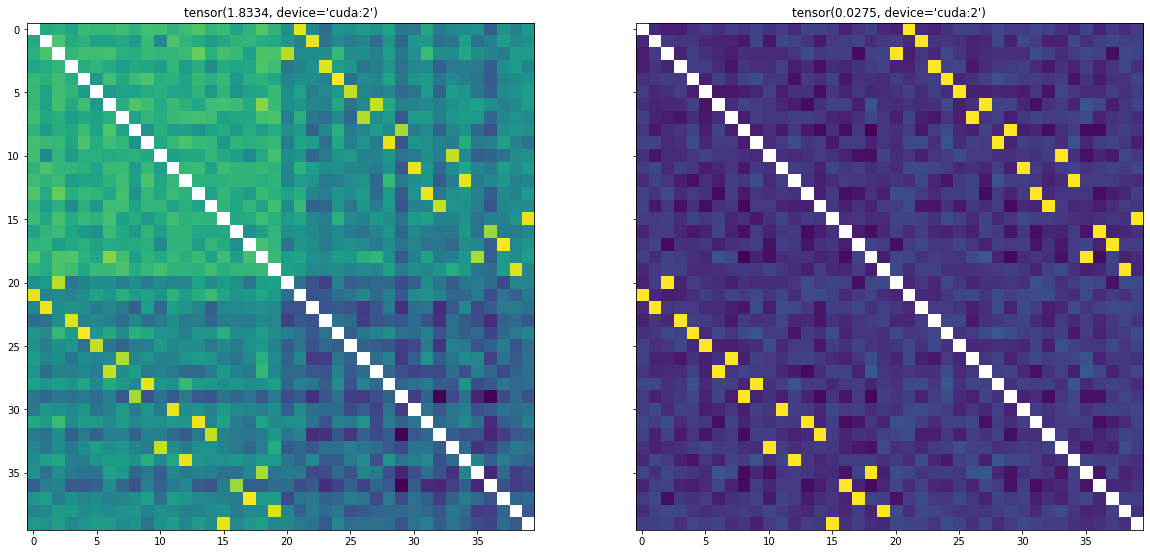

In [3]:
torch.manual_seed(0)
np.random.seed(0)
fig, axs = plt.subplots(1, 2, figsize=(20, 10), sharex=True, sharey=True)

slots = torch.empty(2, B, K, C, device=device)
for b in range(B):
    slots[0, b, :, :] = torch.rand_like(slots[0, b, :, :])
    slots[1, b, :, :] = slots[0, b, :, :] + 0.3 * torch.randn_like(slots[0, b, :, :])
    slots[1, b, :, :] = slots[1, b, np.random.permutation(K), :]
slots = slots.reshape(2 * B, K, -1)

cos = (
    cos_pairwise(slots.reshape(2 * B * K, -1)).fill_diagonal_(-torch.inf).cpu().numpy()
)
axs[0].imshow(cos)
axs[0].set_title(str(matching_contrastive_loss(slots, 0.1)))

print(matching_contrastive_loss(slots, 0.1))
for i in range(15_000):
    slots.requires_grad_()
    slots.grad = None
    matching_contrastive_loss(slots, 0.1).backward()
    slots = slots.detach() - 0.05 * slots.grad
print(matching_contrastive_loss(slots, 0.1))

cos = (
    cos_pairwise(slots.reshape(2 * B * K, -1)).fill_diagonal_(-torch.inf).cpu().numpy()
)
axs[1].imshow(cos)
axs[1].set_title(str(matching_contrastive_loss(slots, 0.1)));